In [1]:
%load_ext autoreload
%autoreload 2

In [256]:
import numpy as np
from scipy import integrate, interpolate
import matplotlib.pyplot as plt
from importlib.resources import files

import MicroTools as micro
from MicroTools import unfolder
import MiniTools as mini
import const
import param_scan

In [610]:
mode='fhc'
bar=''

In [611]:
MC_data = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_numudis_2009.{mode}mode",
            f"miniboone_numu{bar}_ntuple.txt",
        )
    )
numu_data = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_numudis_2009.{mode}mode",
            f"miniboone_numu{bar}data_disap.txt",
        )
    )

fract_covariance = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_numudis_2009.{mode}mode",
            f"miniboone_frac_shape_matrix_numu{bar}_disap.txt",
        )
    )

    # energy bins -- same for nu and nubar
bin_e = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_numudis_2009.{mode}mode",
            f"miniboone_binboundaries_disap.txt",
        )
    )
bin_e *= 1e3
bin_widths = np.diff(bin_e)

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_13905/2725951673.py:2: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_13905/2725951673.py:8: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_13905/2725951673.py:15: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_13905/2725951673.py:23: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https:/

In [612]:
MC_data_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_numu{bar}nue{bar}fullosc_ntuple.txt",
        )
    )
nue_data_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_nue{bar}data_lowe.txt",
        )
    )
numu_data_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_numu{bar}data.txt",
        )
    )

nue_bkg_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_nue{bar}bgr_lowe.txt",
        )
    )
numu_MC_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode", f"miniboone_numu{bar}.txt"
        )
    )

fract_covariance_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_full_fractcovmatrix_nu{bar}_lowe.txt",
        )
    )

    # energy bins -- same for nu and nubar
bin_e_app = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.combined",
            f"miniboone_binboundaries_nue_lowe.txt",
        )
    )
bin_widths_app = np.diff(bin_e_app)
bin_edges_numu_app = np.array([0, 0.5, 0.7, 0.9, 1.1, 1.3, 1.50, 1.7, 1.9]) * 1e3  # MeV

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_13905/3845048022.py:2: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_13905/3845048022.py:8: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_13905/3845048022.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_13905/3845048022.py:21: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https:/

In [613]:
MC_data_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode",
            f"miniboone_numu{bar}nue{bar}fullosc_ntuple.txt",
        )
    )
nue_data_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode",
            f"miniboone_nue{bar}data_lowe.txt",
        )
    )
numu_data_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode",
            f"miniboone_numu{bar}data.txt",
        )
    )

nue_bkg_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode",
            f"miniboone_nue{bar}bgr_lowe.txt",
        )
    )
numu_MC_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode", f"miniboone_numu{bar}.txt"
        )
    )

fract_covariance_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.{mode}mode",
            f"miniboone_full_fractcovmatrix_nu{bar}_lowe.txt",
        )
    )

    # energy bins -- same for nu and nubar
bin_e_app_2018 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2018.fhcmode",
            f"miniboone_binboundaries_nue_lowe.txt",
        )
    )
bin_widths_app_2018 = np.diff(bin_e_app_2018)
bin_edges_numu_app_2018 = np.array([0, 0.5, 0.7, 0.9, 1.1, 1.3, 1.50, 1.7, 1.9]) * 1e3  # MeV

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_13905/4061615260.py:2: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_13905/4061615260.py:8: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_13905/4061615260.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_13905/4061615260.py:21: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https:/

In [614]:
MC_data_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode",
            f"miniboone_numu{bar}nue{bar}fullosc_ntuple.txt",
        )
    )
nue_data_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode",
            f"miniboone_nue{bar}data_lowe.txt",
        )
    )
numu_data_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode",
            f"miniboone_numu{bar}data.txt",
        )
    )

nue_bkg_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode",
            f"miniboone_nue{bar}bgr_lowe.txt",
        )
    )
numu_MC_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode", f"miniboone_numu{bar}.txt"
        )
    )

fract_covariance_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.{mode}mode",
            f"miniboone_full_fractcovmatrix_nu{bar}_lowe.txt",
        )
    )

    # energy bins -- same for nu and nubar
bin_e_app_2012 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2012.fhcmode",
            f"miniboone_binboundaries_nue_lowe.txt",
        )
    )
bin_widths_app_2012 = np.diff(bin_e_app_2012)
bin_edges_numu_app_2012 = np.array([0, 0.5, 0.7, 0.9, 1.1, 1.3, 1.50, 1.7, 1.9]) * 1e3  # MeV

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_13905/850314770.py:2: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_13905/850314770.py:8: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_13905/850314770.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_13905/850314770.py:21: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://imp

In [615]:
MC_data_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode",
            f"miniboone_numu{bar}nue{bar}fullosc_ntuple.txt",
        )
    )
nue_data_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode",
            f"miniboone_nue{bar}data_lowe.txt",
        )
    )
numu_data_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode",
            f"miniboone_numu{bar}data.txt",
        )
    )

nue_bkg_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode",
            f"miniboone_nue{bar}bgr_lowe.txt",
        )
    )
numu_MC_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode", f"miniboone_numu{bar}.txt"
        )
    )

fract_covariance_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.{mode}mode",
            f"miniboone_full_fractcovmatrix_nu{bar}_lowe.txt",
        )
    )

    # energy bins -- same for nu and nubar
bin_e_app_2009 = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2009.fhcmode",
            f"miniboone_binboundaries_lowe.txt",
        )
    )
bin_widths_app_2009 = np.diff(bin_e_app_2009)
bin_edges_numu_app_2009 = np.array([0, 0.5, 0.7, 0.9, 1.1, 1.3, 1.50, 1.7, 1.9]) * 1e3  # MeV

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_13905/74215449.py:2: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_13905/74215449.py:8: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_13905/74215449.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_13905/74215449.py:21: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importl

In [616]:
# Load the MiniBooNE MC from data release\
Ereco = MC_data[:, 1]*1e3 # MeV
Etrue = MC_data[:, 2]*1e3 # MeV
Length = MC_data[:, 3] # Kilometers
if mode=='fhc':
    RELATIVE_POTS_09_to_20_dis = 5.58 / 18.75
    Weight = MC_data[:, 4] / np.sum(MC_data[:, 4]) * 1.90454e5 / RELATIVE_POTS_09_to_20_dis
else:
    RELATIVE_POTS_09_to_20_dis =  3.39 / 11.27
    Weight = MC_data[:, 4] / np.sum(MC_data[:, 4]) * 2.7053e4 / RELATIVE_POTS_09_to_20_dis

In [617]:
# Load the MiniBooNE MC from data release\
Ereco_app = MC_data_app[:, 0] # MeV
Etrue_app = MC_data_app[:, 1] # MeV
Length_app = MC_data_app[:, 2] / 1e5  # Kilometers
Weight_app = MC_data_app[:, 3] / len(MC_data_app[:, 3])

# Load the MiniBooNE MC from data release\
if mode == 'fhc':
    RELATIVE_POTS_18_to_20 = 12.84 / 18.75
else:
    RELATIVE_POTS_18_to_20 = 11.27 / 11.27 # Same dataset

Ereco_app_2018 = MC_data_app_2018[:, 0] # MeV
Etrue_app_2018 = MC_data_app_2018[:, 1] # MeV
Length_app_2018 = MC_data_app_2018[:, 2] / 1e5  # Kilometers
Weight_app_2018 = MC_data_app_2018[:, 3] / len(MC_data_app_2018[:, 3]) / RELATIVE_POTS_18_to_20

# Load the MiniBooNE MC from data release\
if mode == 'fhc':
    RELATIVE_POTS_12_to_20 = 6.46 / 18.75
else:
    RELATIVE_POTS_12_to_20 = 11.27 / 11.27 # Same dataset

Ereco_app_2012 = MC_data_app_2012[:, 0] # MeV
Etrue_app_2012 = MC_data_app_2012[:, 1] # MeV
Length_app_2012 = MC_data_app_2012[:, 2] / 1e5  # Kilometers
Weight_app_2012 = MC_data_app_2012[:, 3] / len(MC_data_app_2012[:, 3]) / RELATIVE_POTS_12_to_20


# Load the MiniBooNE MC from data release\
if mode == 'fhc':
    RELATIVE_POTS_09_to_20 = 6.46 / 18.75
else:
    RELATIVE_POTS_09_to_20 = 3.39 / 11.27

Ereco_app_2009 = MC_data_app_2009[:, 0] # MeV
Etrue_app_2009 = MC_data_app_2009[:, 1] # MeV
Length_app_2009 = MC_data_app_2009[:, 2] / 1e5  # Kilometers
Weight_app_2009 = MC_data_app_2009[:, 3] / len(MC_data_app_2009[:, 3]) / RELATIVE_POTS_09_to_20

In [618]:
MC_numu, _ = np.histogram(Ereco, weights=Weight, bins=bin_edges_numu_app, density=False)

numu_MC_app_2009.sum()/RELATIVE_POTS_09_to_20, numu_MC_app_2012.sum()/RELATIVE_POTS_12_to_20, numu_MC_app_2018.sum()/RELATIVE_POTS_18_to_20, numu_MC_app.sum(), MC_numu.sum(), numu_data.sum()/RELATIVE_POTS_09_to_20_dis

(339502.6799535603,
 339345.9911958204,
 339345.99220210285,
 339345.992202,
 639966.3978494633,
 639966.3978494623)

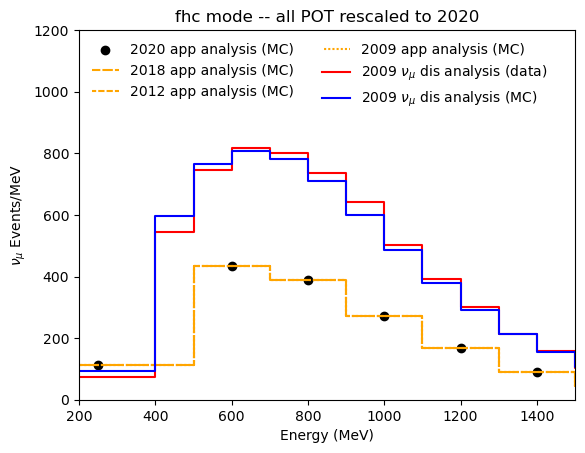

In [619]:
norm_numu_app = np.diff(bin_edges_numu_app)
# plt.step(bin_edges_numu_app[:-1], numu_MC_app/norm_numu_app, where='post', color='black', label=r'2020 app analysis (MC)')
plt.scatter(bin_edges_numu_app[:-1] + np.diff(bin_edges_numu_app)/2, numu_MC_app/norm_numu_app, color='black', label=r'2020 app analysis (MC)')
plt.step(bin_edges_numu_app_2018[:-1], numu_MC_app_2018/RELATIVE_POTS_18_to_20/norm_numu_app, where='post', color='orange', label=r'2018 app analysis (MC)', ls=(1,(5,1)))
plt.step(bin_edges_numu_app_2012[:-1], numu_MC_app_2012/RELATIVE_POTS_12_to_20/norm_numu_app, where='post', color='orange', label=r'2012 app analysis (MC)', ls=(1,(3,1)))
plt.step(bin_edges_numu_app_2009[:-1], numu_MC_app_2009/RELATIVE_POTS_09_to_20/norm_numu_app, where='post', color='orange', label=r'2009 app analysis (MC)', ls=(1,(1,1)))

plt.step(bin_e[:-1], numu_data/RELATIVE_POTS_09_to_20_dis/np.diff(bin_e), where='post', color='red', label=r'2009 $\nu_\mu$ dis analysis (data)', ls='-')

# MC_numu, _ = np.histogram(Ereco, weights=Weight, bins=bin_edges_numu_app, density=False)
# plt.step(bin_edges_numu_app[:-1], (MC_numu)/norm_numu_app, where='post', color='dodgerblue', label=r'2009 $\nu_\mu$ dis release (MC)')
MC_numu, _ = np.histogram(Ereco, weights=Weight, bins=bin_e, density=False)
plt.step(bin_e[:-1], (MC_numu)/np.diff(bin_e), where='post', color='blue', label=r'2009 $\nu_\mu$ dis analysis (MC)')


plt.xlim(200,1500)
if mode == 'fhc':
    plt.ylim(0,1200)
    plt.ylabel(r'$\nu_\mu$ Events/MeV')
else:
    plt.ylim(0,140)
    plt.ylabel(r'$\overline{\nu}_\mu$ Events/MeV')
plt.xlabel('Energy (MeV)')
plt.legend(frameon=False, loc='upper left', ncol=2)
plt.title(f'{mode} mode -- all POT rescaled to 2020')
plt.savefig(f'plots/comparison_numus_{mode}mode.pdf', dpi=300, bbox_inches='tight')

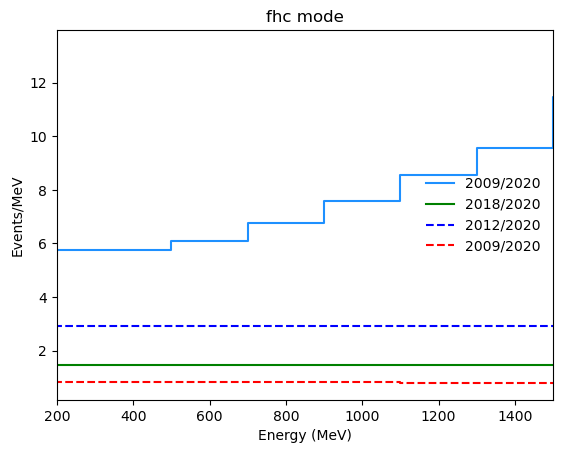

In [609]:
normalization = bin_widths
normalization = np.diff(bin_edges_numu_app)
MC_numu, _ = np.histogram(Ereco, weights=Weight, bins=bin_edges_numu_app, density=False)
plt.step(bin_edges_numu_app[:-1], MC_numu/numu_MC_app/1.85, where='post', color='dodgerblue', label=r'2009/2020')
plt.step(bin_edges_numu_app[:-1], numu_MC_app_2018/RELATIVE_POTS_18_to_20/numu_MC_app, where='post', color='green', label=r'2018/2020')
plt.step(bin_edges_numu_app[:-1], numu_MC_app_2012/RELATIVE_POTS_12_to_20/numu_MC_app, where='post', color='blue', ls='--', label=r'2012/2020')
plt.step(bin_edges_numu_app[:-1], numu_MC_app_2009/RELATIVE_POTS_09_to_20/numu_MC_app, where='post', color='red', ls='--', label=r'2009/2020')

plt.xlim(200,1500)
# plt.ylim(0,600)
plt.ylabel('Events/MeV')
plt.xlabel('Energy (MeV)')
plt.legend(frameon=False, loc='center right')
plt.title(f'{mode} mode')
plt.savefig(f'plots/comparison_numus_{mode}mode.pdf', dpi=300, bbox_inches='tight')

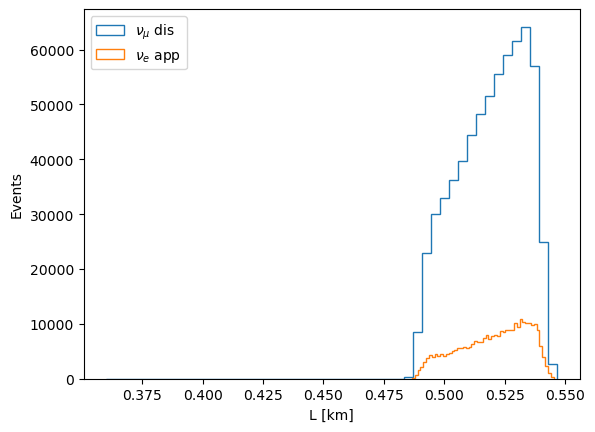

In [318]:
_=plt.hist(Length, bins=50, weights=Weight, fc='orange', histtype='step', density=False, label=r'$\nu_\mu$ dis')
_=plt.hist(Length_app, bins=50, weights=Weight_app, fc='dodgerblue', histtype='step', density=False, label=r'$\nu_e$ app')
plt.xlabel('L [km]')
plt.ylabel('Events')
plt.legend()

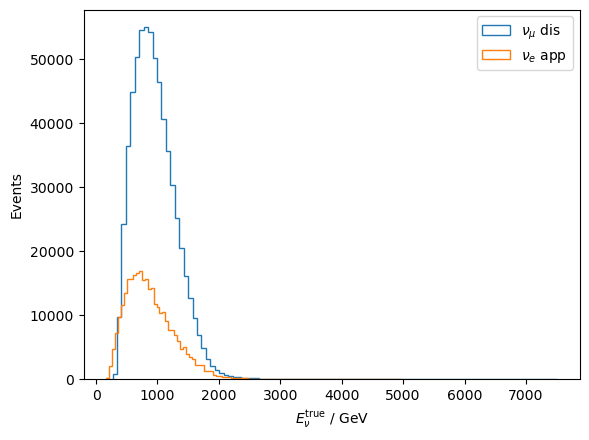

In [478]:
_=plt.hist(Etrue, bins=100, weights=Weight, fc='orange', histtype='step', density=False, label=r'$\nu_\mu$ dis')
_=plt.hist(Etrue_app, bins=100, weights=Weight_app, fc='dodgerblue', histtype='step', density=False, label=r'$\nu_e$ app')
plt.xlabel(r'$E_\nu^{\rm true}$ / GeV')
plt.ylabel('Events')
plt.legend()
# plt.yscale('log')

In [5]:
flux = np.genfromtxt('MiniTools/include/fluxes/MiniBooNE_FHC.dat')
enu = flux[:,0]*1e3 # MeV
F_nue = interpolate.interp1d(enu, flux[:,1], bounds_error=False, fill_value=0)
F_numu = interpolate.interp1d(enu, flux[:,2], bounds_error=False, fill_value=0)

In [6]:
def P(Enu, L, sin2thetaSQR=0.807, dmSQR=0.043):
    Enu = 1e-3 * Enu
    return sin2thetaSQR * np.sin(1.27*dmSQR * L/Enu)**2

In [7]:
import param_scan
theta={}
theta["g"] =0
theta["m4"] = np.sqrt(0.043)
theta["Ue4Sq"] = 1
theta["Um4Sq"] = 0.807/4

st = param_scan.Sterile(theta, oscillations=True, decay=False, decouple_decay=True)


In [8]:
import MiniTools as mini
mini.fit.chi2_MiniBooNE_2020(MC_numu_osc, 1, 1)

AttributeError: module 'MiniTools.fit' has no attribute 'chi2_MiniBooNE_2020'

In [477]:
normalization = bin_widths

MC_numu_osc, _ = np.histogram(Ereco, weights=Weight*P(Etrue, Length, sin2thetaSQR=0.807, dmSQR=0.043), bins=bin_e, density=False)
MC_nue, _ = np.histogram(Ereco, weights=Weight*F_nue(Etrue)/F_numu(Etrue), bins=bin_e, density=False)
# 
MC_numu_osc_mine, _ = np.histogram(Ereco, weights=Weight*st.Pme(Etrue*1e-3, Etrue*1e-3, Length), bins=bin_e, density=False)
plt.step(bin_e[:-1], MC_nue/normalization, where='post', color='orange', label='MC total bkg')
BKG_counts, _ = np.histogram(bin_e[:-1], weights=nue_bkg, bins=bin_e, density=False)
plt.step(bin_e[:-1], BKG_counts/normalization, where='post', color='black', label='MC nue (flux reweighted)')

plt.step(bin_e[:-1], (MC_numu_osc+BKG_counts)/normalization, where='post', color='dodgerblue', label='MC numu to nue oscillated')
plt.step(bin_e[:-1], (MC_numu_osc_mine+BKG_counts)/normalization, where='post', color='dodgerblue', label='MC numu to nue oscillated (mine)', linestyle='--')

data_counts, _ = np.histogram(bin_e[:-1], weights=nue_data, bins=bin_e, density=False)
plt.errorbar(bin_e[:-1]+bin_widths/2, data_counts/normalization, xerr=bin_widths/2, yerr=np.sqrt(data_counts)/normalization, fmt='k.', ecolor='black')

plt.xlim(200,1500)
plt.ylabel('Events/MeV')
plt.xlabel('Energy (MeV)')
plt.legend()


NameError: name 'P' is not defined

<BarContainer object of 11 artists>

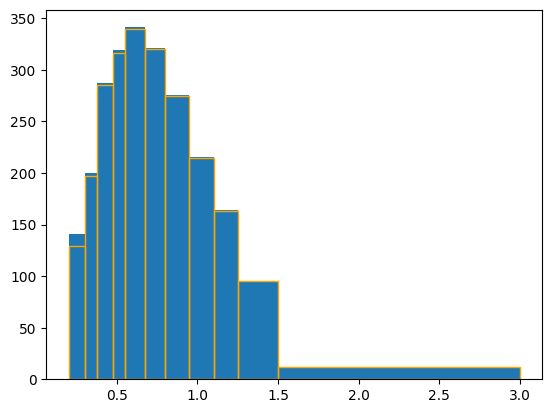

In [11]:
migration_matrix_unfolding_bins = param_scan.create_reco_migration_matrix(
    param_scan.MB_Ereco_unfold_bins
)  # 13 bins
migration_matrix_official_bins = param_scan.create_reco_migration_matrix(
    param_scan.MB_Ereco_official_bins
)  # 11 bins


# MBSig_for_unfolding = np.dot(
#         (np.histogram(Etrue*1e-3, bins=param_scan.e_prod_e_int_bins, weights=Weight)[0]),
#         migration_matrix_unfolding_bins,
#     )
# # plt.plot(MBSig_for_unfolding)
# plt.step(param_scan.MB_Ereco_unfold_bins[:-1], MBSig_for_unfolding, where='post')
bins = param_scan.MB_Ereco_official_bins
MBSig_for_fit = np.dot(
        (np.histogram(Etrue*1e-3, bins=param_scan.e_prod_e_int_bins, weights=Weight)[0]),
        migration_matrix_official_bins)
w = np.diff(bins)
x = bins[:-1] + w/2
plt.bar(x, MBSig_for_fit/w/1e3, w)

MC_numu_osc, _ = np.histogram(Ereco*1e-3, weights=Weight, bins=bins, density=False)
plt.bar(x, MC_numu_osc/w/1e3, w, facecolor='None', edgecolor='orange')
# plt.xlim(0.2,1.5)

<BarContainer object of 13 artists>

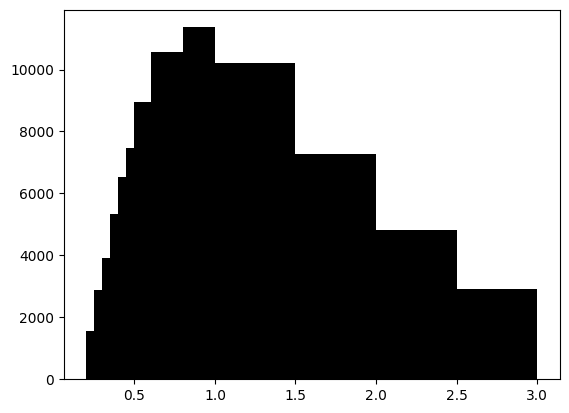

In [17]:
MCT = np.load(f"{micro.muB_inclusive_data_path}/MuB_NuE_True.npy")
MuB_True_BinEdges = [
    0.200,
    0.250,
    0.300,
    0.350,
    0.400,
    0.450,
    0.500,
    0.600,
    0.800,
    1.000,
    1.500,
    2.000,
    2.500,
    3.000,
]

de = np.diff(MuB_True_BinEdges)
ec = MuB_True_BinEdges[:-1]+de/2

plt.bar(ec, MCT/de, de, color='black')


In [131]:
from MicroTools import unfolder

GB = unfolder.MBtomuB(
    analysis="1eX",
    remove_high_energy=False,
    unfold=False,
    effNoUnfold=True,
    which_template="2020",
)

unf = unfolder.MBtomuB(
    analysis="1eX",
    remove_high_energy=False,
    unfold=True,
    effNoUnfold=True,
    which_template="2020",
)


In [133]:
np.shape(unf._migration)
len(MBSig_for_fit)

11

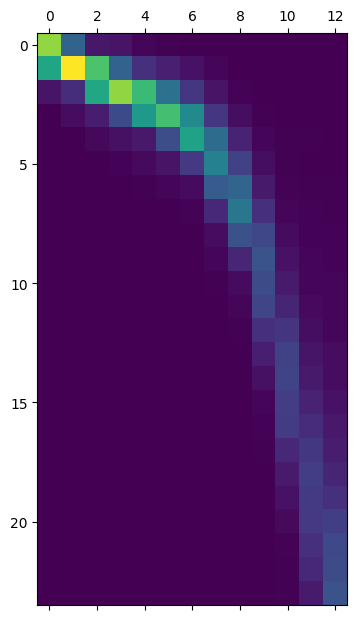

In [165]:
M =  np.loadtxt(
                f"{micro.path_unfolding_data}Migration_1eX.dat"
            )
plt.matshow(M)
# plt.plot(np.sum(M, axis=0))

1.0

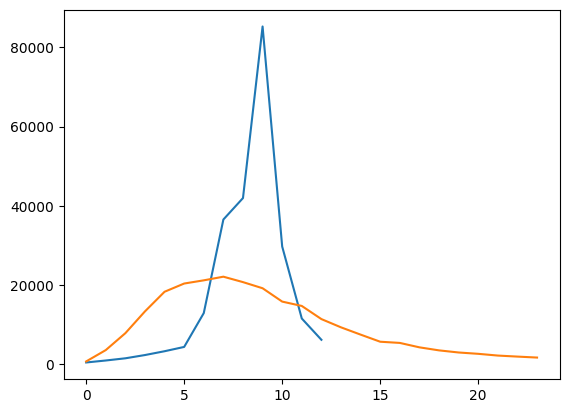

In [178]:
# plt.plot(GB.miniToMicro(MBSig_for_fit))
# plt.plot(unf.miniToMicro(MBSig_for_fit))
plt.plot(unf.miniToMicro(MBSig_for_fit))
plt.plot(np.matmul(M, unf.miniToMicro(MBSig_for_fit)))

unf.miniToMicro(MBSig_for_fit).sum() / (np.matmul(M, unf.miniToMicro(MBSig_for_fit))).sum()